# Problem Settings

- Background: With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
- Goal: Predict the sales price for each house; for each Id in the test set, you must predict the value of the SalePrice variable.
- [Overview](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
- [Data Description](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

# Import Libraries and Data

In [19]:
# -*- coding: utf-8 -*-
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')  #ignore warning msg

#Pandas Config.
#For the default setting: reset_option(param) 
pd.set_option("display.max_rows", 100)  #출력할 행의 수
pd.set_option('display.max_columns', None)  #출력할 열의 수; None for the entire columns
pd.set_option('display.max_colwidth', 1000)  #열의 너비; None for the entire columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format scientific notation from Pandas

%matplotlib inline

In [21]:
path = "../data/raw/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
# y_train = train.SalePrice.values
# y_test = test.SalePrice.values
# train.columns = [i.lower() for i in train.columns]
# test.columns = [i.lower() for i in test.columns]

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)


In [22]:
print(data.shape)

(2919, 80)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [24]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Device Setting


In [26]:
!nvidia-smi

Sat Jan  6 23:20:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off | 00000000:01:00.0  On |                  N/A |
|  0%   34C    P8               4W / 285W |    817MiB / 12282MiB |     18%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# EDA

## What are the key predictors?
My assumption for what variables would be influential predictors for the housing price:
- LotArea: Lot size in square feet
- Neighborhood: Physical locations within Ames city limits (string type)
- HouseStyle: Style of dwelling (string type)
- Bedroom: Number of Bedrooms
- OverallQual Rates the overall material and finish of the house (1 to 10 integer type)
- YearBuilt: Original construction date
- YrSold: Year Sold

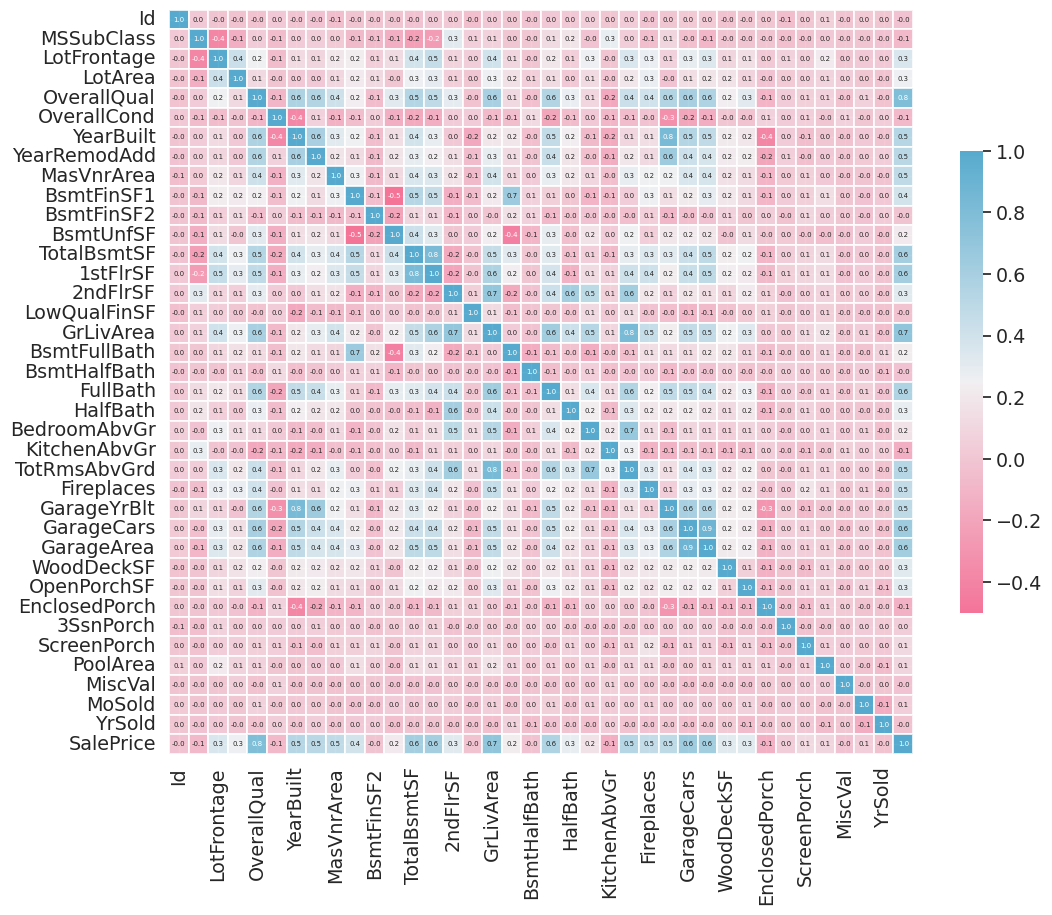

In [27]:
# correlation matrix

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)  #color map

plt.subplots(figsize=(12,12))
cormat = train[train.dtypes[train.dtypes != "object"].index].corr()
sns.heatmap(cormat.round(2),
            # cmap="Greys_r", #"OrRd_r", #"Greys_r", #"BuPu_r", #"Blues_r",
            cmap=cmap,
            linewidths=.1,            
            alpha=.8,
            square=True,
            annot=True,
            annot_kws={'size': 5},
            fmt=".1f",
            # cbar=False,
            cbar_kws={"shrink": .5},           
);


Surprisingly, there are a number of unexpected variables that are strongly correlated to the target variable such as:
- garageyrblt/garagecars/garagearea: not sure why these are so important, but i guess garage means something crucial for Americans 
- fullbath/totrmsabvgrd/fireplaces
- grlivarea/totalbsmtsf/1stflrsf/2ndflrsf: rather than lotarea, the variables representing size of a specific location matter more. 

The most strongly (and positively) correlated variable was: overallqual. On the other hand, interestingly enough, overallcond does not have a strong correlation.

And, there are no strongly negatively correlated variables less than -0.1.

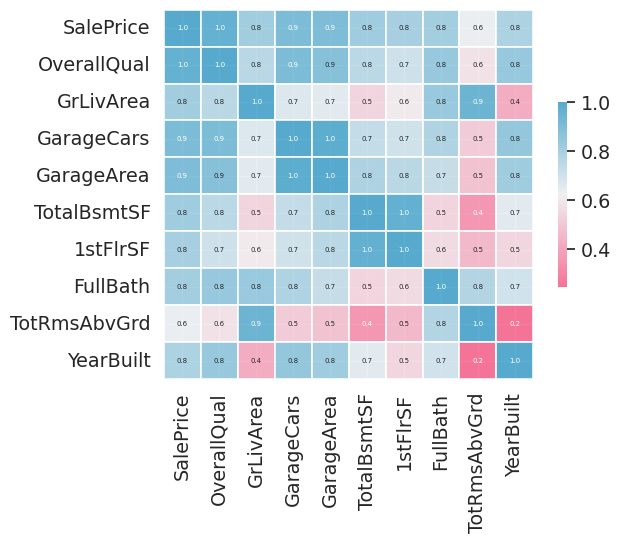

In [28]:
# correlation matrix w/ 10 most strongly correlated predictors with the saleprice 

k = 10 #number of variables for heatmap
cols = cormat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(cormat[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
            cmap=cmap,
            linewidths=.1,            
            alpha=.8,
            square=True,
            annot=True,
            annot_kws={'size': 5},
            fmt=".1f",
            # cbar=False,
            cbar_kws={"shrink": .5},
            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

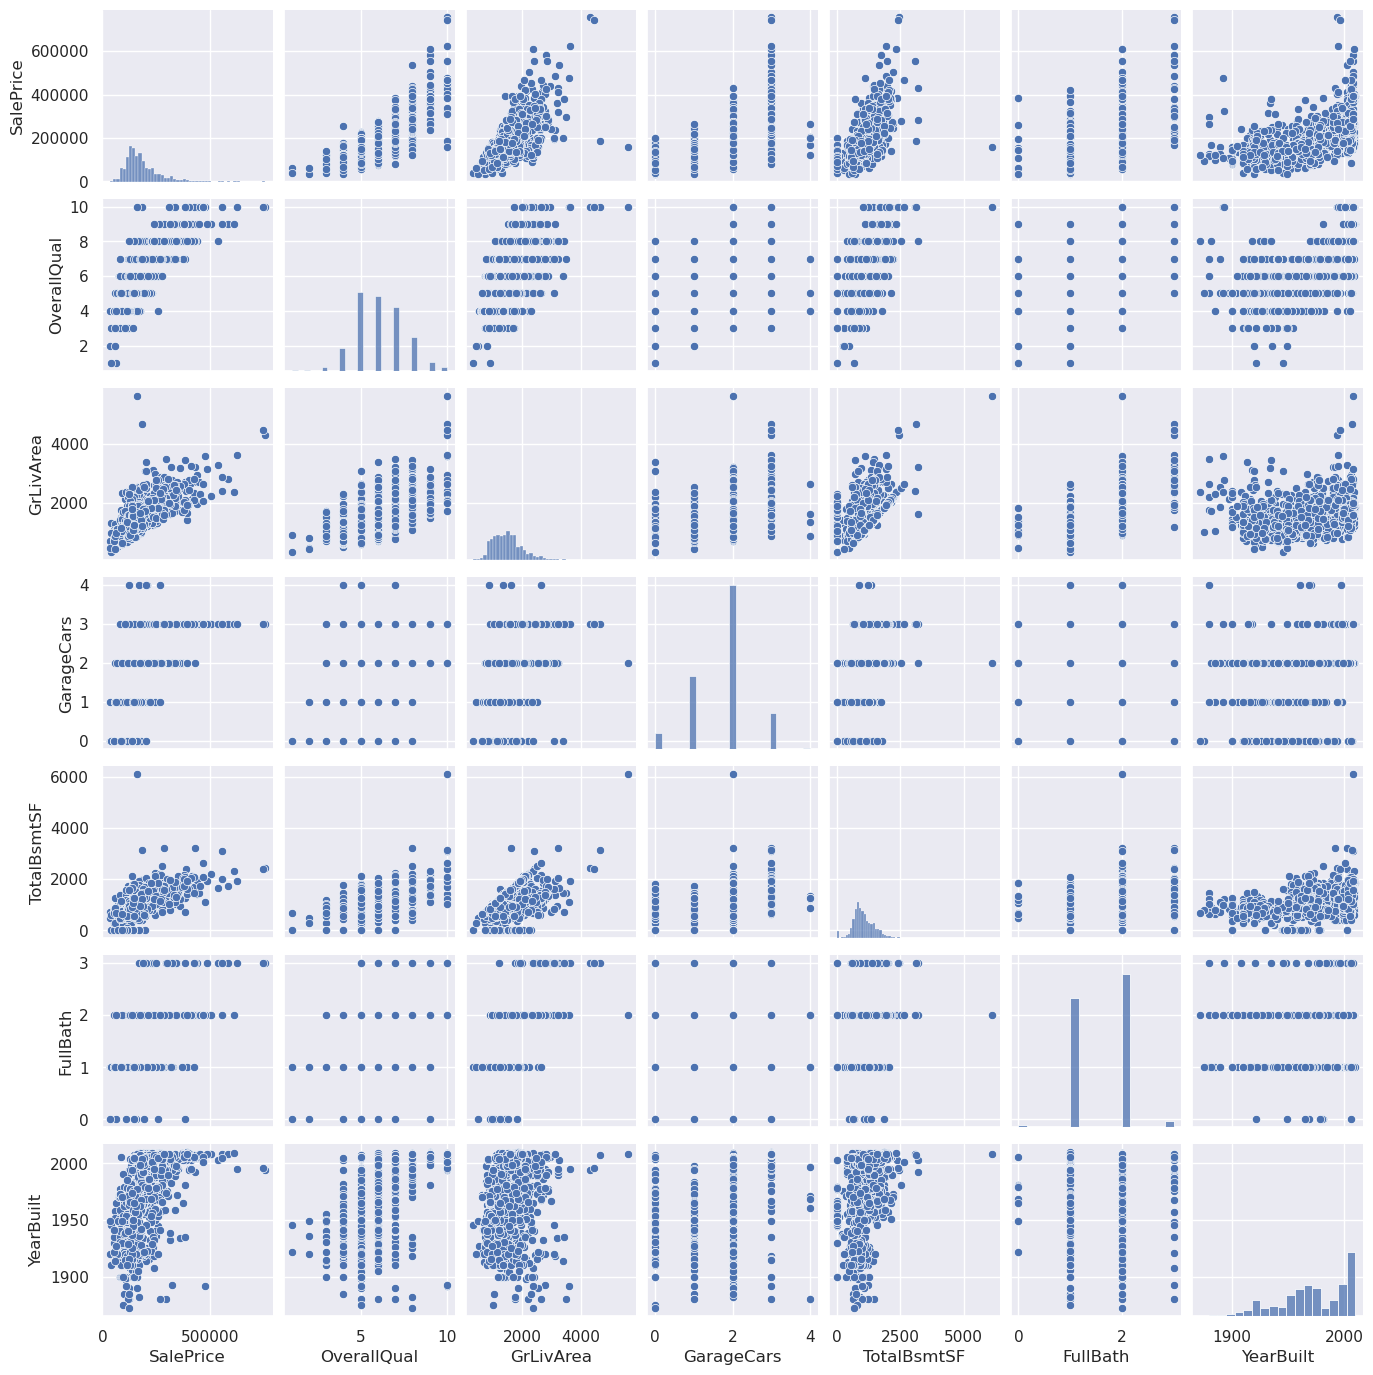

In [33]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2)
plt.show();

# Handle Missing Values
- https://www.kaggle.com/code/dansbecker/handling-missing-values

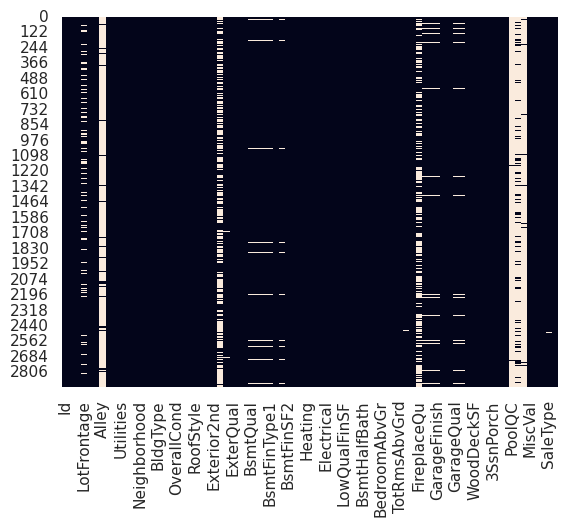

In [34]:
# data[data.isna().any(axis=1)]
sns.heatmap(data.isnull(), cbar=False);

In [62]:
# see if there are not helpful predictors 
data.nunique().sort_values()

Utilities           2
CentralAir          2
Street              2
BsmtHalfBath        3
Alley               3
HalfBath            3
PavedDrive          3
LandSlope           3
KitchenAbvGr        4
BsmtFullBath        4
PoolQC              4
KitchenQual         4
GarageFinish        4
LandContour         4
LotShape            4
MasVnrType          4
ExterQual           4
ExterCond           5
FullBath            5
HeatingQC           5
BldgType            5
BsmtCond            5
BsmtExposure        5
Electrical          5
LotConfig           5
Fence               5
MiscFeature         5
MSZoning            5
YrSold              5
Fireplaces          5
BsmtQual            5
Heating             6
GarageQual          6
GarageCond          6
FireplaceQu         6
GarageCars          6
SaleCondition       6
RoofStyle           6
Foundation          6
GarageType          7
BsmtFinType2        7
Functional          7
BsmtFinType1        7
HouseStyle          8
Condition2          8
RoofMatl  

In [67]:
data.groupby("Utilities").size(), data.groupby("CentralAir").size(), data.groupby("Street").size()

(Utilities
 AllPub    2916
 NoSeWa       1
 dtype: int64,
 CentralAir
 N     196
 Y    2723
 dtype: int64,
 Street
 Grvl      12
 Pave    2907
 dtype: int64)

In [72]:
# drop features not very predictive 
data = data.drop(["Utilities", "Street"], axis=1)

# fill NAs with "None" string 
non_col_list = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                "GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                "MasVnrType", "MSSubClass"
                ]
for col in non_col_list:
    # print(col, data[col].isnull().sum())
    data[col] = data[col].fillna("None")
    # print(col, data[col].isnull().sum())

# fill NAs with 0
zero_col_list = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in zero_col_list:
    data[col] = data[col].fillna(0)

# fill NAs with mode (not many nulls)
mode_col_list = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]
for col in mode_col_list:
    data[col] = data[col].fillna(data[col].mode().values[0])

# else
data["Functional"] = data["Functional"].fillna("Typ")
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median())) 
# Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood
# we can fill in missing values by the median LotFrontage of the neighborhood.

# Type Casting

In [76]:
data.dtypes[data.dtypes=="object"]

# cormat = train[train.dtypes[train.dtypes != "object"].index].corr()

MSZoning         object
Alley            object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [82]:
# ordinal features
ord_col_list = ["MSSubClass", "OverallCond", "YrSold", "MoSold"]
for col in ord_col_list:
    data[col] = data[col].astype(str)

In [83]:
from sklearn.preprocessing import LabelEncoder
cat_col_list = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
                'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
                'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
                'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
                'YrSold', 'MoSold']
# process columns, apply LabelEncoder to categorical features
for c in cat_col_list:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape data: {}'.format(data.shape))

Shape data: (2919, 78)


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Alley          2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

# Handle Outliers 
- https://www.kaggle.com/code/masumrumi/a-detailed-regression-guide-with-house-pricing

In [6]:
data["saleprice"].describe(percentiles=np.arange(0.05, 1, 0.05))

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
15%     115000.000
20%     124000.000
25%     129975.000
30%     135500.000
35%     141000.000
40%     147000.000
45%     155000.000
50%     163000.000
55%     172500.000
60%     179280.000
65%     187500.000
70%     198620.000
75%     214000.000
80%     230000.000
85%     250000.000
90%     278000.000
95%     326100.000
max     755000.000
Name: saleprice, dtype: float64

In [7]:
# IQR method to handle outliers
Q1 = data["saleprice"].quantile(0.25)
Q3 = data["saleprice"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR


new_data = data[~((data["saleprice"] < (lower_thresh)) |(data["saleprice"] > (upper_thresh)))]
print(data.shape, new_data.shape)


(1460, 81) (1399, 81)


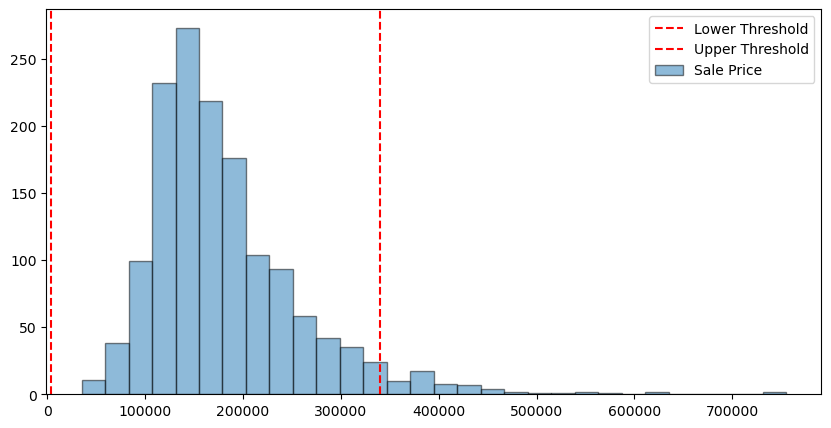

In [8]:
plt.figure(figsize=(10, 5))

plt.hist(data["saleprice"], bins=30, edgecolor='black', alpha=0.5)
plt.axvline(x=lower_thresh, color='r', linestyle='--')
plt.axvline(x=upper_thresh, color='r', linestyle='--')
plt.legend(['Lower Threshold', 'Upper Threshold', 'Sale Price'])

plt.show()

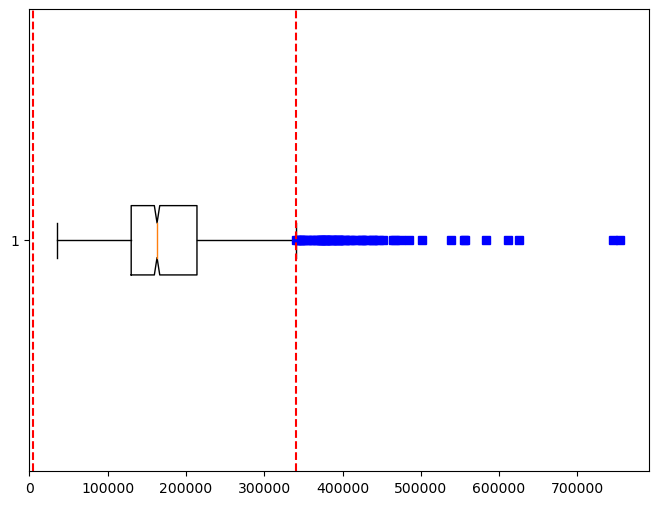

In [9]:
plt.figure(figsize=(8, 6))

plt.boxplot(data["saleprice"],            
            notch=1, # if 'True' then notched box plot
            sym='bs', # symbol: red square
            vert=0, # vertical box aligmnent
            )

plt.axvline(x=lower_thresh, color='r', linestyle='--')
plt.axvline(x=upper_thresh, color='r', linestyle='--')

plt.show()


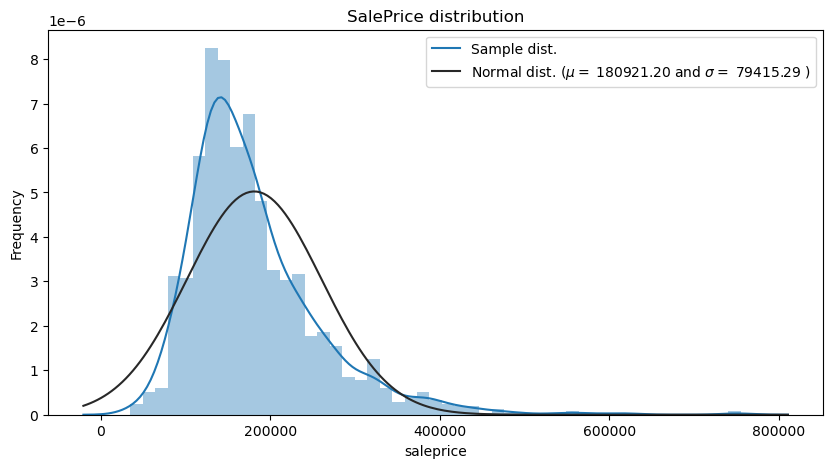

In [10]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['saleprice'])

sns.distplot(data['saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



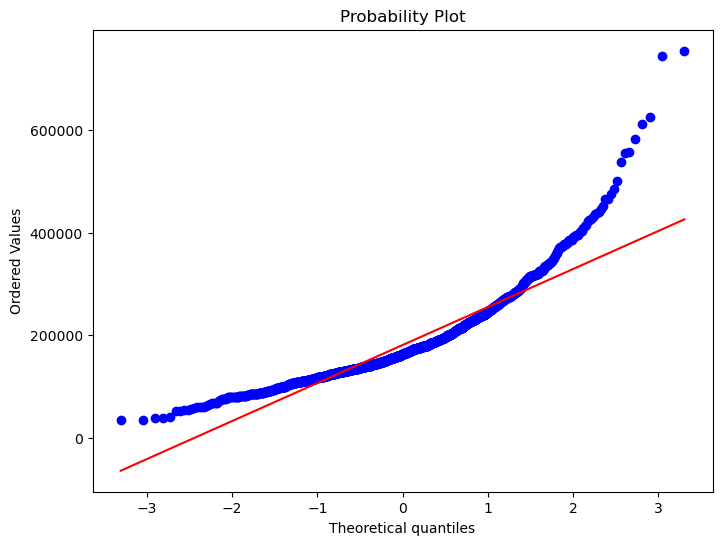

In [59]:
plt.figure(figsize=(8, 6))

stats.probplot(data["saleprice"], plot=plt)

plt.show()

- Sample values are starting at certain level around 30k and there seems to be right-skewed.
- If we're going to implement linear models, we need to transform the variable into more normally distributed one.

## Data Transformation
- Find skewed variables
- Implement Data Transformation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [19]:
## Import necessary modules 
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

data["bcx_saleprice"] = boxcox1p(data["saleprice"], boxcox_normmax(data["saleprice"] + 1))

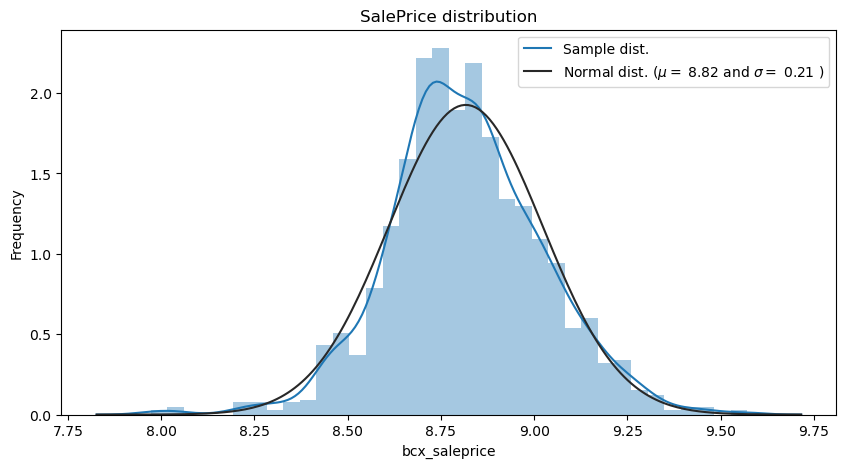

In [20]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['bcx_saleprice'])

sns.distplot(data['bcx_saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



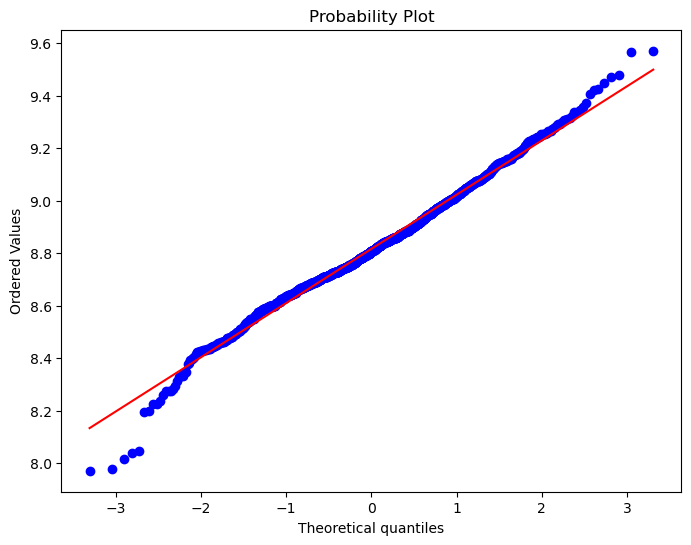

In [21]:
plt.figure(figsize=(8, 6))

stats.probplot(data["bcx_saleprice"], plot=plt)

plt.show()

In [11]:
data["log_saleprice"] = np.log1p(data["saleprice"])

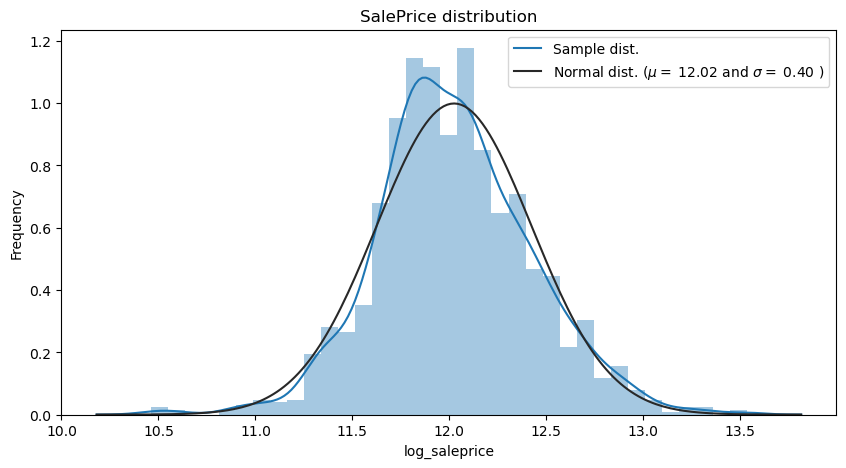

In [14]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['log_saleprice'])

sns.distplot(data['log_saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



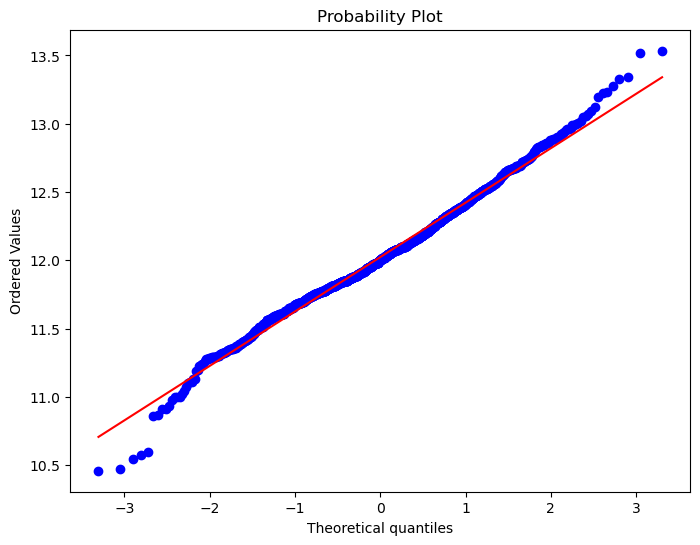

In [13]:
plt.figure(figsize=(8, 6))

stats.probplot(data["log_saleprice"], plot=plt)

plt.show()

In [26]:
skew(data["saleprice"]), skew(data["bcx_saleprice"]), skew(data["log_saleprice"])

(1.880940746034036, 0.029469016443659627, 0.12122191311528363)

# Modeling
- https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

In [ ]:
# XGBRegressor(tree_method='gpu_hist', gpu_id=0)
# LGBMRegressor(device='gpu')

<!-- XGBRegressor(tree_method='gpu_hist', gpu_id=0) -->